<h2 align="center"> Customer Lifetime Value Prediction </h2>

<h3><u>Overview<u></h3>

<p>Customer Lifetime Value (CLV) is an important metric for businesses to optimize marketing efforts, initiatives, and budgets. It indicates the total revenue a business can reasonably expect from the single customer account throughout the business relationship.</p>
<p>Calculating CLV by customer segment will offer expanded insights into an organization's well being. It will help the companies :</p>
<li>Identify their high value or loyal customers and create campaigns directed at them.</li>
<li>This will significantly improve customer retention and reduce the customer acquistion costs.</li>
<li>It will give the companies an insight to their business model and how its effectiveness.</li>
<br>
<p>In this report, we will be calculating CLV score using the formula:</p>
<h3 align='center'>Customer Lifetime Value = Customer Value * Average Customer Lifespan</h3>
<hr>

<h3><u>The Data</u></h3>

<p>The data being used behind this report is an online retail dataset  which is openly available on kaggle <a href="https://www.kaggle.com/code/iambideniz/crm-analytics-rfm-analysis-cltv-prediction/data?select=online_retail_II.xlsx">www.kaggle.com/code/iambideniz/crm-analytics/online_retail_II.xlsx</a>. The dataset contains all purchases( over 500k) made for an online retail company based in the UK during an eight month period. It contains a single csv file namely OnlineRetail.csv with information of each purchase.</p>
<hr>

<h3>OnlineRetail.csv</h3>

<p>It contains every purchase wih information of the customer along with the order details. </p>

|Columns|Definition|
|----------|----------|
|Customer ID|unique id for each customer|
|Invoice|unique invoice number for each purchase|
|StockCode|stock code for each item|
|Description|description of item|
|Quantity|quantity of each item|
|InvoiceDate|Date of purchase|
|Price|price of one unit of item|
|Country|country of the customer|

<h3>Gather the Data</h3>

In [318]:
%pip install openpyxl
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install plotly


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ankur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ankur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ankur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\ankur\appdata\local\programs\python\python310\lib\site-packages (3.5.2)



You should consider upgrading via the 'C:\Users\ankur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\ankur\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [319]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as spl

In [320]:
customer_data = pd.read_excel('online_retail_II.xlsx', sheet_name="Year 2009-2010")

#create a column with total revenue generated in each order
customer_data["Revenue"] = customer_data['Price']*customer_data['Quantity']

# let's look at first 5 peice of data
customer_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


<h3>Monthly Trends</h3>

We will be first looking at some of the monthly trends like monthly revenue, monthly active users and monthly average revenue per order. These metrics will give us an insight of the company's growth.

#### Monthly Revenue

We will first convert the purchase date of the orders by their years and months. After setting up the dates, we will sum up the revenue generated by each order by their year and month and reset our index to default.

In [322]:
#first, we will convert the order_purchase_timestamp field from string to datetime
customer_data['InvoiceDate'] = pd.to_datetime(customer_data['InvoiceDate'])

#Now, we will be creating a column for converting the date of purchase into year and month format suing the lambda function
customer_data['InvoiceYearMonth'] = customer_data['InvoiceDate'].map(lambda date: date.year*100 + date.month)

#grouping the revenue of the company with the each month
monthly_revenue = customer_data.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()

let's visualise this data on a line graph with month of purchase as x-axis and the revenue genearated on y-axis.

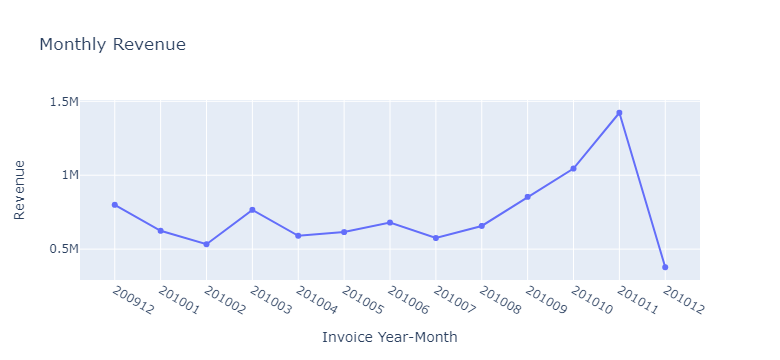

In [323]:
fig = go.Figure(data = go.Scatter(x = monthly_revenue['InvoiceYearMonth'], y = monthly_revenue['Revenue']))
fig.update_layout(title="Monthly Revenue", xaxis_title="Invoice Year-Month", yaxis_title="Revenue", xaxis={'type':'category'})
fig.show()

This clearly shows that our revenue is growing escpecially from july, 2010 onwards. The sudden decline in december is due to incomplete data for that month.

### Monthly Active Customers

Similar to Monthly Revenue, we will be grouping the data according to the purchase date(year-month format) while keeping track of the number of unique customers id to get the active customers in that particular time period.

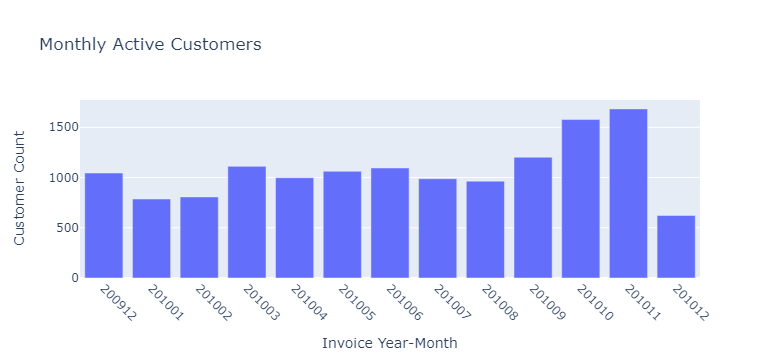

In [324]:
monthly_active = customer_data.groupby('InvoiceYearMonth')['Customer ID'].nunique().reset_index()
monthly_active.rename(columns={'Customer ID':'customer_count'}, inplace=True)

fig = go.Figure(data = go.Bar(x = monthly_active['InvoiceYearMonth'], y = monthly_active['customer_count']))
fig.update_layout(title="Monthly Active Customers", xaxis_title="Invoice Year-Month", yaxis_title="Customer Count"
                 , xaxis={'type':'category', 'tickangle':45})
fig.show()

The bar graph depiction here shows that the active customers for the company is uniform throught the course till August, 2010 and it increases afterwards with a 50% increase in the November, 2010. This shows a positive growth rate for the company throughout the year.

### Average Purchase value


Next, we will be looking at average purchase/revenue value for each order. This will be a metric for measuring the amount of money that a company can expect to generate from an individual customer. We will be grouping this data over the time period of each month as done in previous trends.

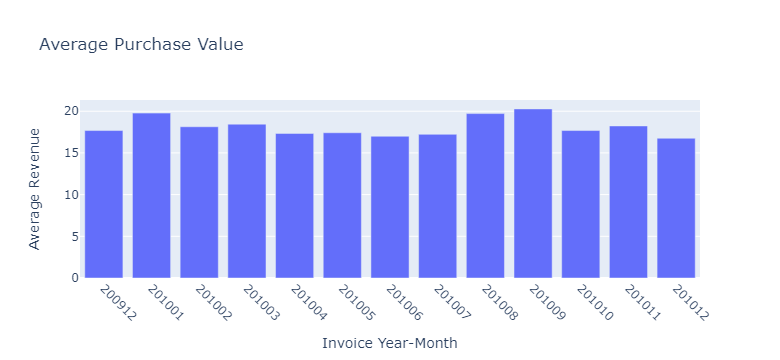

In [325]:
average_purchase = customer_data.groupby('InvoiceYearMonth')['Revenue'].mean().reset_index()

# plot the bar graph for the data
fig = go.Figure(data = go.Bar(x = average_purchase['InvoiceYearMonth'], y = average_purchase['Revenue']))
fig.update_layout(title="Average Purchase Value", xaxis_title="Invoice Year-Month", yaxis_title="Average Revenue"
                 , xaxis={'type':'category', 'tickangle':45})
fig.show()

This clearly shows that even though the monthly active customers and revenue is low for some months, their average revenue per order is in contrast with other high revenue generating months.

## Customer Segmentation

We cannot treat every customer with same content and importance. Customers who uses our platorm will be having different needs and they have their own profile. We should be dividing these customers into group of individuals that are similar in specific ways relevant to marketing, spend analysis and other factors. We will then be comparing the lifetime values of these groups.

### RFM (Recency, Frequency and Monetary)

There can be many different segmentation techniques according to our needs. However, for this report we will be looking at customer segmentation through <b>RFM</b> factor i.e. Recency, Frequency and Monetary features of the customers. 

### Recency

Recency tells us how recently a customer has made a purchase. It gives us an insight about the buying behaviour of the customer.
For calculating recency, we will look into the most recent purchase of each customer

In [326]:
# create a datframe with each customer id and their max Invoice Date
customer_recency = customer_data[['Customer ID', 'InvoiceDate']]

# normalize datetime to date
customer_recency['InvoiceDate'] = customer_data['InvoiceDate'].map(lambda date: date.normalize())

customer_recency = customer_recency.groupby('Customer ID')['InvoiceDate'].max().reset_index()

#setting the customer recency score
customer_recency['Recency'] = (customer_recency['InvoiceDate'].max() - customer_recency['InvoiceDate']).dt.days
customer_recency.rename(columns={'InvoiceDate':'MaxInvoiceDate'}, inplace=True)

customer_recency.head()


C:\Users\ankur\AppData\Local\Temp\ipykernel_16044\3802221831.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Customer ID,MaxInvoiceDate,Recency
0,12346.0,2010-10-04,66
1,12347.0,2010-12-07,2
2,12348.0,2010-09-27,73
3,12349.0,2010-10-28,42
4,12351.0,2010-11-29,10


Let's visualise our recency score on a histogram

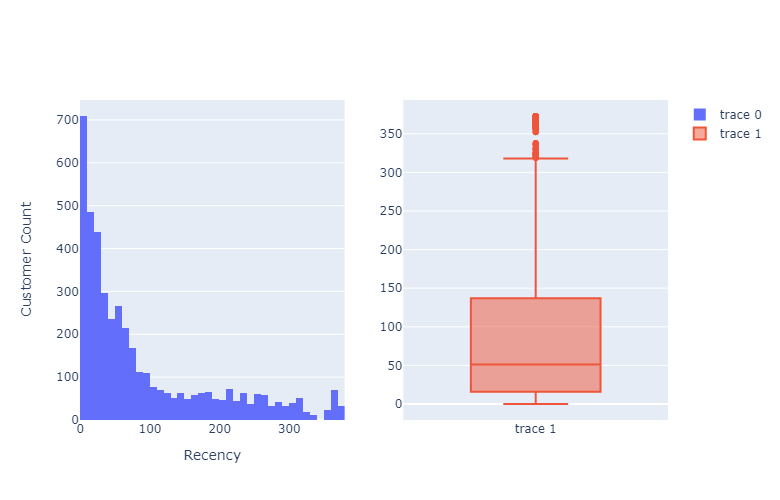

In [327]:
fig = spl.make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=customer_recency['Recency']), row=1, col=1)
fig.update_layout(width=800, height=500, xaxis_title="Recency", yaxis_title="Customer Count")

fig.add_trace(go.Box( y=customer_recency['Recency']), row=1, col=2)
fig.update_layout(xaxis_title="Recency")
fig.show()


The histogram on the left side shows that the distribution of recency across our customers. More than 700 customers have recently purchased from the site in between 0-9 days.

The box plot in the right side gives a more calculated and informative distribution. We can see that this is a positive skewed box plot with its mean > median. The median value i.e. 51 shows us that 50% of customers have recency less than 51. <br>
The outliers for our recency distribution can be seen across the upper fence value of 318. These outliers are the low valued customers whose last purchase is more than 10 months ago

### Frequency

Now, we are going to look into the frequency of purchase for each customer. The data will give us an insight of how frequent he purchases your product.

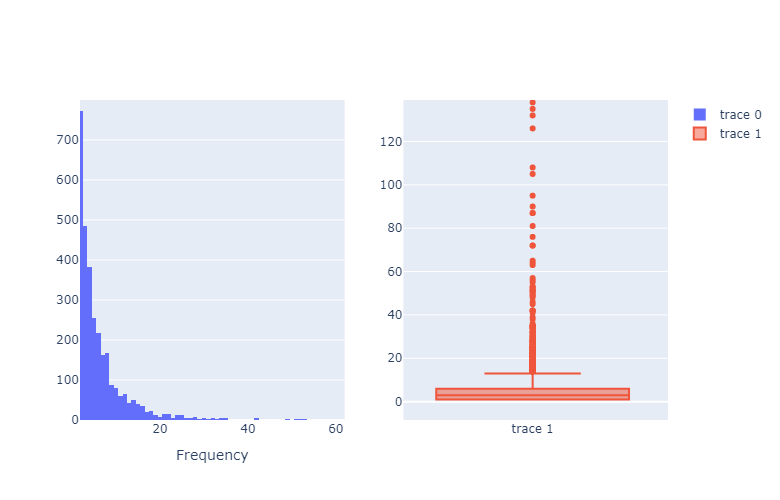

In [328]:
# group the customers by their unique customer along with count of their each purchase
frequency = customer_data.groupby('Customer ID')['Invoice'].nunique().reset_index()

#set column name as frequency
frequency.columns=['Customer ID', 'Frequency']

fig = spl.make_subplots(rows=1, cols=2)

fig.add_trace(go.Histogram(x=frequency['Frequency']), row=1, col=1)
fig.update_layout(width=800, height=500, xaxis_title="Frequency")

fig.add_trace(go.Box(y=frequency['Frequency']), row=1, col=2)
fig.update_layout(width=800, height=500, xaxis_title="Frequency")
fig.show()

<b>High frequency means high valuable customer</b>

The frequency distribution on the left side using histogram shows us that more than 1200 customers have frequency of 1. It tells us that the company has less customer retention rate and greater customer churn rate.

The box plot in the right side givs us the information about the median of the data which is 3 and the outliers which lie beyond frequency score of 13. However, these outliers are the most valuable customers for the company.

### Monetary

The monetary feature describes the revenue generated by each customer. Fo this, we will grouping the data by customer id along with their total revenue generated for the company.

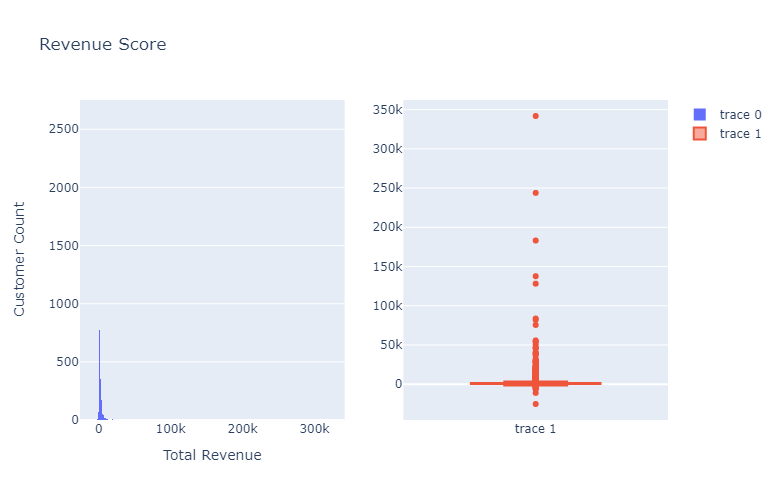

In [330]:
monetary = customer_data.groupby('Customer ID')['Revenue'].sum().reset_index()
monetary.columns=['Customer ID', 'Monetary']

fig = spl.make_subplots(rows=1, cols=2)
fig.add_trace(go.Histogram(x=monetary['Monetary']), row=1, col=1)
fig.update_layout(xaxis_title="Total Revenue", yaxis_title="Customer Count", title="Revenue Score", width=800, height= 500)
fig.add_trace(go.Box(y=monetary['Monetary']), row=1, col=2)


The plot on the left side shows that the more than 2500 customers have generated the revenue in less than 1000.

The box plot on the right gives us a more understanding and eplanative view of data. It can be seen that the median for our data is 655 and the majority of customer have generated revenue less than 3686. It can also be seen with min and lower fence that some of the customers have generated negative revenue for the company.
The outliers in our box plot specifies our most valuable customers for the company with high revenues.

### Scoring the RFM values

Now, for the segmentation of customers, we will need to filter our RFM values before the analysis. We would be giving our customers a score for each of their RFM features based on the below score table.

|Score|Recency|Frequency|Monetary|
|------------|----------|-----------|----------|
|0|last bought 11 months ago|bought once a year|<=1000|
|1|last bought 9 months ago|bought 3 times a year|1001-4000|
|2|last bought 6 months ago|bought 5 times a year|4001-7000|
|3|last bought 3 months ago|bought 7 times a year|7001-10000|
|4|last bought a months ago|bought 10 times a year|>10000|

In [332]:
def recency_score(score):
    if score<30:
        return 4
    elif score>=30 and score<90:
        return 3
    elif score>=90 and score<180:
        return 2
    elif score>=180 and score<270:
        return 1
    else:
        return 0

def frequency_score(score):
    if score <= 1:
        return 0
    elif score>1 and score<=3:
        return 1
    elif score>3 and score<=5:
        return 2
    elif score>5 and score<=7:
        return 3
    elif score>7:
        return 4

def monetary_value(score):
    if score<=1000:
        return 0
    elif score>1000 and score<=4000:
        return 1
    elif score>4000 and score<=7000:
        return 2
    elif score>7000 and score<=10000:
        return 3
    elif score>10000:
        return 4

#scoring the Recency values
customer_recency['Recency Score'] = customer_recency['Recency'].map(lambda score: recency_score(score))

#scoring the frequency values
frequency['Frequency Score'] = frequency['Frequency'].map(lambda score: frequency_score(score))

#scoring the monetary values
monetary['Monetary Score'] = monetary['Monetary'].map(lambda score: monetary_value(score))


### Overall Score

Now, we will be finding the total score for each customer which will be the sum of its RFM scores. The total score can take place anywhere in between 0-12. We will be segmenting our customers into different section based on the score.

In [334]:
overall_score = pd.merge(customer_recency[['Customer ID', 'Recency Score']], frequency[['Customer ID','Frequency Score']], on='Customer ID')
overall_score = pd.merge(overall_score, monetary, on='Customer ID')
overall_score['Overall Score'] = overall_score['Frequency Score'] + overall_score['Monetary Score'] + overall_score['Recency Score']
df = overall_score.groupby('Overall Score')[['Recency Score', 'Frequency Score', 'Monetary Score']].mean()

overall_score.head()

,Customer ID,Recency Score,Frequency Score,Monetary,Monetary Score,Overall Score
0,12346.0,3,4,-64.68,0,7
1,12347.0,4,1,1323.32,1,6
2,12348.0,3,0,222.16,0,3
3,12349.0,3,2,2646.99,1,6
4,12351.0,4,0,300.93,0,4


Now, lets give the customers a value based on their overall scores.

|Overall Score|Customer value|
|-----|-----|
|0-3|inactive|
|4-6|low|
|7-9|mid|
|>=10|high|

In [335]:
def values(score):
    if score<4:
        return 'inactive'
    elif score<7:
        return 'low'
    elif score<10:
        return 'mid'
    else:
        return 'high'

overall_score['value'] = overall_score['Overall Score'].map(lambda score: values(score))
overall_score

,Customer ID,Recency Score,Frequency Score,Monetary,Monetary Score,Overall Score,value
0,12346.0,3,4,-64.68,0,7,mid
1,12347.0,4,1,1323.32,1,6,low
2,12348.0,3,0,222.16,0,3,inactive
3,12349.0,3,2,2646.99,1,6,low
4,12351.0,4,0,300.93,0,4,low
...,...,...,...,...,...,...,...
4378,18283.0,4,3,641.77,0,7,mid
4379,18284.0,3,1,436.68,0,4,low
4380,18285.0,0,0,427.00,0,0,inactive
4381,18286.0,2,1,1188.43,1,4,low


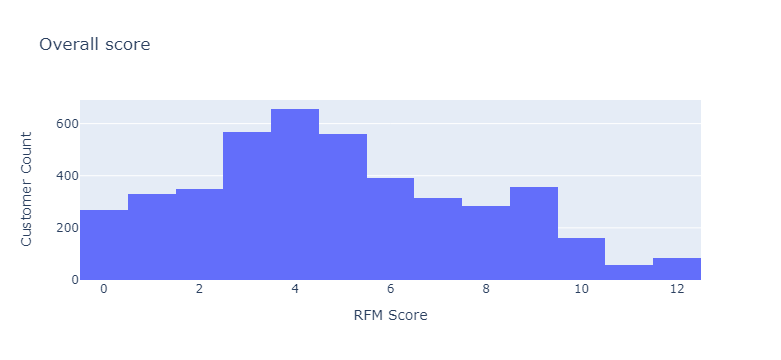

In [336]:
fig = go.Figure(go.Histogram(x=overall_score['Overall Score']))
fig.update_layout(xaxis_title="RFM Score", yaxis_title="Customer Count", title="Overall score")
fig.show()

The above histogram shows the number of customers for each value of their overall RFM score. the RFM score of 4 has most number of customers(>650). We can see our most valuable customers past the RFM score of 10.

## Calculating Lifetime Value

Now that we have segmented our customers based on the RFM score, next we will be calculating the lifetime value for each customer based on their RFM scores and then comparing the lifetime value with their RFM score. For calculating the CLV, we will be using a simple formula:

<center><b><h4>Customer Lifetime Value = Customer Value * Average Customer Lifespan</h4></b></center>
<br>
We will be calculating each parameter and storing it in a new dataframe customer_lifetime.

### Customer Value

The customer value is metric that will tell us the value of that customer to the business over a certain period of time. We can calculate the customer value using the formula:

<center><h4>Customer Value = Average Purchase Value * Average Purchase Frequency Rate</h4></center>
</br>
<b>Average Purchase value = Total Revenue / No of orders</b>
<br>
<b>Average Purchase Frequency Rate = No of Purchases / No of customers</b>
<br><br><br>
Since we will be calculating the customer value and frequency for each customer, hence the customer lifetime value will be equal to the total revenue made to the business by that customer. We can use our previously calculated <b>revenue</b> dataframe for this purpose.

In [340]:
# adding the average purchase value
customer_lifetime = revenue[['Customer ID', 'Total Revenue']]

customer_lifetime.columns=['Customer ID', 'Customer Value']

### Customer lifespan

For this report we have been using the data over a time period from December, 2009 to December, 2010. Therefore, our calculation have been made over the 1 year time period. Hence we will be setting the customer lifespan of 12 months for calculating the CLV score.

In [341]:
customer_lifetime['Lifespan (months)'] = 12

# calculating the CLV score
customer_lifetime['CLV Score'] = customer_lifetime['Customer Value']*customer_lifetime['Lifespan (months)']
customer_lifetime.head()

,Customer ID,Customer Value,Lifespan (months),CLV Score
0,12346.0,-64.68,12,-776.16
1,12347.0,1323.32,12,15879.84
2,12348.0,222.16,12,2665.92
3,12349.0,2646.99,12,31763.88
4,12351.0,300.93,12,3611.16


## Now, let's visualise our CLV score

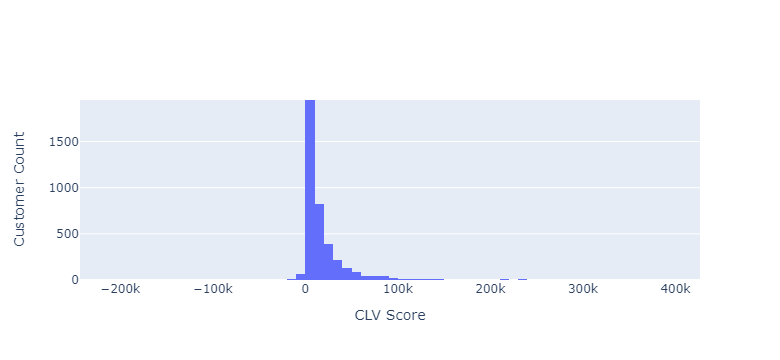

In [342]:
fig = go.Figure(go.Histogram(x=customer_lifetime['CLV Score']))
fig.update_layout(xaxis_title="CLV Score", yaxis_title="Customer Count")

Now, we will be visualising the CLV score of our customers corrosponding to their RFM score. We will also be segmenting them according to their values.

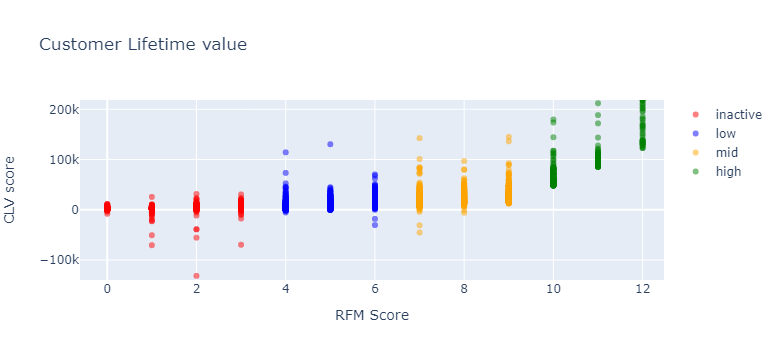

In [343]:
# gather the data of CLV score and segment for each customer
df = pd.merge(customer_lifetime[['Customer ID', 'CLV Score']], overall_score[['Customer ID','Overall Score', 'value']], on='Customer ID')

plot_data=[go.Scatter(
    x=df.query("value=='inactive'")['Overall Score'],
    y=df.query("value=='inactive'")['CLV Score'],
    mode="markers",
    name="inactive",
    marker=dict(color='red', opacity=0.5)
),
go.Scatter(
    x=df.query("value=='low'")['Overall Score'],
    y=df.query("value=='low'")['CLV Score'],
    mode="markers",
    name="low",
    marker=dict(color='blue', opacity=0.5)
),
go.Scatter(
    x=df.query("value=='mid'")['Overall Score'],
    y=df.query("value=='mid'")['CLV Score'],
    mode="markers",
    name="mid",
    marker=dict(color='orange', opacity=0.5)
),
go.Scatter(
    x=df.query("value=='high'")['Overall Score'],
    y=df.query("value=='high'")['CLV Score'],
    mode="markers",
    name="high",
    marker=dict(color='green', opacity=0.5)
),]

fig = go.Figure(data=plot_data)
fig.update_layout(title="Customer Lifetime value", xaxis_title="RFM Score", yaxis_title="CLV score")
fig.show()

The above scatter plot depicts the customer lifetime value from inactive customer to highly active and important customers for the business. The graph here also confirms that our segmentation of customers based on the RFM score is correct as we see a positive growth in the customer lifetime value as we move up the RFM score. 

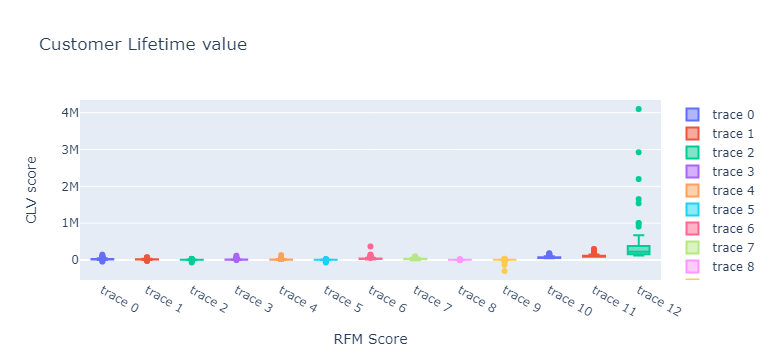

In [367]:
plot_data=[]

df.rename(columns={'Overall Score':'Sc'}, inplace=True)
# plotting using box-plot
for score in df['Sc'].unique():
    plot_data.append(go.Box(y=df.query("Sc == @score")['CLV Score']))

fig = go.Figure(data = plot_data)
fig.update_layout(title="Customer Lifetime value", xaxis_title="RFM Score", yaxis_title="CLV score")

fig.show()


The box plot here gives us more insight about the median and outliers for each segments.

## Result

In this report, we have analysed the customer lifetime value and RFM Score of each customer of an online retail store. The data and analysis here gives the company a more insight into their customers purchasing patterns and helps them indentify their more valuable customers. 
The CLV score and the RFM has been proven benficial for this purpose as it can be seen from below graph.
<img src="newplot (2).png">

At the end, we have divided our customers into 4 segments and the company can apply different marketing strategies to each segment which can result in lower acquistion cost and high company growth rate.
|Segment|desciption|Marketing Strategies|
|--------|---------|--------------------|
|Inactive|These are the ones who have purchased only once or twice from the company have generated very low or negative revenue for the company|customer satisfaction survey/feedback|
|Low|These are the potential customers who can be profitable to the business and can come in upper segments of the company|Tergeted content, Improve retention|
|Mid|They are in middle of high value and low value of customers who make quite good revenue for the business but need to become permanent buyers|Improve retention and increase frequency|
|High|They are the highest revenue generating customers and company would not want to lose them|Increase Frequency, Customer Loyalty Programs|

## Conclusion

The customer lifetime value analysis enables us to employ specific strategies around pricing, sales, advertising and customer retention with a goal of continuously reducing costs and increasing profit. This directly leads to increase in profitability to the businesses.